In [ ]:
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from tqdm import tqdm
from google.colab import files
from scipy import linalg as lg 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
np.set_printoptions(threshold=False)
import cv2
import os
from google.colab import drive

drive.mount('/content/drive/')



Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
!unzip /content/archive  -d "/content/dataset"

path = "/content/dataset/"
dirs = glob.glob(f'{path}*/')
read_img = []
for dir in tqdm(dirs):
    images = [np.array(Image.open(image)) for image in glob.glob(f'{dir}*')]
    print(images)
    read_img.append(images)

Archive:  /content/archive.zip
replace /content/dataset/README? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /content/dataset/README  
  inflating: /content/dataset/s1/1.pgm  
  inflating: /content/dataset/s1/10.pgm  
  inflating: /content/dataset/s1/2.pgm  
  inflating: /content/dataset/s1/3.pgm  
  inflating: /content/dataset/s1/4.pgm  
  inflating: /content/dataset/s1/5.pgm  
  inflating: /content/dataset/s1/6.pgm  
  inflating: /content/dataset/s1/7.pgm  
  inflating: /content/dataset/s1/8.pgm  
  inflating: /content/dataset/s1/9.pgm  
  inflating: /content/dataset/s10/1.pgm  
  inflating: /content/dataset/s10/10.pgm  
  inflating: /content/dataset/s10/2.pgm  
  inflating: /content/dataset/s10/3.pgm  
  inflating: /content/dataset/s10/4.pgm  
  inflating: /content/dataset/s10/5.pgm  
  inflating: /content/dataset/s10/6.pgm  
  inflating: /content/dataset/s10/7.pgm  
  inflating: /content/dataset/s10/8.pgm  
  inflating: /content/dataset/s10/9.pgm  
  inflating: /content/dat

  0%|          | 0/40 [00:00<?, ?it/s]

[array([[133, 129, 133, ..., 126, 126, 124],
       [129, 132, 131, ..., 125, 128, 126],
       [132, 129, 131, ..., 126, 125, 127],
       ...,
       [ 30,  31,  20, ...,  22,  33,  32],
       [ 30,  26,  23, ...,  21,  29,  31],
       [ 23,  30,  21, ...,  15,  29,  26]], dtype=uint8), array([[135, 133, 136, ..., 129, 131, 129],
       [135, 139, 132, ..., 131, 133, 129],
       [137, 134, 137, ..., 131, 131, 130],
       ...,
       [ 26,  23,  29, ...,  14,  21,  17],
       [ 31,  20,  30, ...,  17,  20,  17],
       [ 29,  21,  27, ...,  18,  21,  24]], dtype=uint8), array([[132, 118, 124, ..., 132, 129, 129],
       [130, 122, 110, ..., 129, 129, 129],
       [115, 120, 108, ..., 126, 131, 132],
       ...,
       [ 21,  27,  31, ...,  62,  64,  68],
       [ 27,  32,  36, ...,  58,  65,  71],
       [ 32,  38,  39, ...,  56,  67,  62]], dtype=uint8), array([[140, 134, 135, ..., 129, 126, 128],
       [140, 136, 135, ..., 127, 126, 128],
       [142, 132, 137, ..., 126, 128, 

100%|██████████| 40/40 [00:00<00:00, 222.23it/s]

[array([[66, 68, 66, ..., 74, 72, 80],
       [70, 67, 70, ..., 78, 76, 74],
       [71, 69, 68, ..., 74, 75, 75],
       ...,
       [49, 49, 50, ..., 69, 72, 72],
       [49, 49, 52, ..., 73, 69, 76],
       [49, 49, 49, ..., 72, 72, 76]], dtype=uint8), array([[48, 47, 53, ..., 61, 59, 60],
       [50, 48, 52, ..., 56, 61, 58],
       [53, 47, 53, ..., 54, 64, 60],
       ...,
       [50, 55, 49, ..., 64, 67, 59],
       [52, 50, 49, ..., 63, 65, 60],
       [52, 49, 50, ..., 61, 66, 67]], dtype=uint8), array([[68, 68, 69, ..., 69, 70, 75],
       [68, 69, 73, ..., 70, 78, 76],
       [69, 67, 67, ..., 73, 73, 75],
       ...,
       [52, 56, 52, ..., 69, 73, 72],
       [52, 55, 55, ..., 73, 67, 71],
       [58, 54, 59, ..., 73, 67, 69]], dtype=uint8), array([[51, 49, 53, ..., 61, 61, 54],
       [52, 51, 50, ..., 60, 61, 55],
       [51, 49, 50, ..., 59, 62, 59],
       ...,
       [52, 51, 49, ..., 63, 59, 63],
       [48, 50, 49, ..., 64, 58, 61],
       [49, 48, 48, ..., 61, 61,

(112, 92)
(400, 10304)


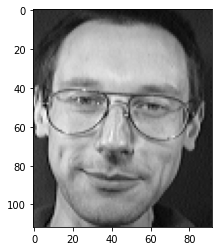

In [ ]:
new_list = []
for i in read_img:
    for j in i:
        new_list.append(j)
plt.imshow(read_img[1][0], cmap='gray')
plt.imshow(new_list[10], cmap='gray')
print(new_list[0].shape)
for i in range(400):
    new_list[i] = new_list[i].reshape(10304)
m = np.array(new_list)
print(m.shape)

In [ ]:
df = pd.DataFrame(new_list)
df['Label'] = 99
x = 0
for y in range(40):
    for i in range(x,x+10):
        df.iat[i,10304] = y+1
    x = x +10

df.iat[0,10304]
df.iat[0,2]
df.loc[df['Label'] == 1]
labels = df["Label"].to_numpy()
df.iloc[[0]]
testing = df.iloc[::2]
training = df.iloc[1::2]

In [ ]:
training['Label'].value_counts()

40    5
39    5
18    5
17    5
16    5
15    5
14    5
13    5
12    5
11    5
10    5
9     5
8     5
7     5
6     5
5     5
4     5
3     5
2     5
19    5
20    5
21    5
31    5
38    5
37    5
36    5
35    5
34    5
33    5
32    5
30    5
22    5
29    5
28    5
27    5
26    5
25    5
24    5
23    5
1     5
Name: Label, dtype: int64

In [ ]:
# Data Split for bonus 30/70
trains = np.zeros((120,10305))
tests = np.zeros((280,10305))
x=0
y=0
for i in range(40):
  temp = df.loc[df['Label'] == i+1]
  temp = np.array(temp)
  trains[x:x+3,:] = temp[0:3,:]
  tests [y:y+7,:] = temp[3:10,:]
  x += 3
  y += 7
tests = pd.DataFrame(tests).rename({10304: 'Label'}, axis='columns') 
trains = pd.DataFrame(trains).rename({10304: 'Label'}, axis='columns') 

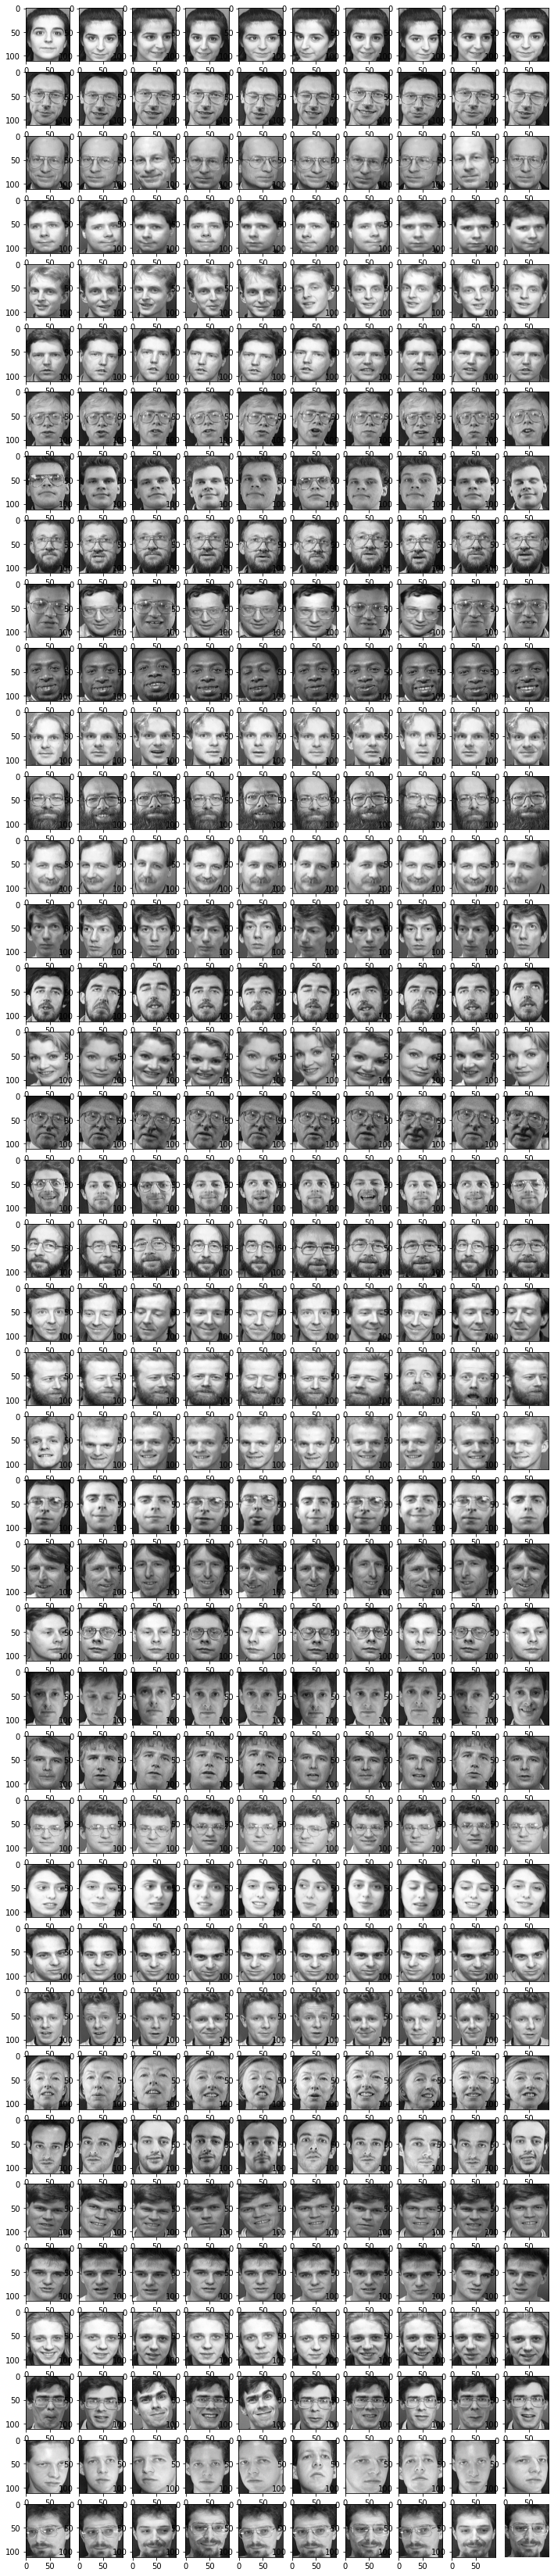

In [ ]:
xx,axxr = plt.subplots(40,10, figsize=(12,60))
for i in range(40):
    for j in range(10):
        axxr[i][j].imshow(read_img[i][j].squeeze(), cmap='gray')
        plt.axis('off')

plt.show()

In [ ]:
df = pd.DataFrame(axxr)

In [ ]:
def KNNClassifier(training_data,training_label,testing_data,testing_label,alpha):
    kneighbours = [1,3,5,7]
    accuracy = []

     #using 1,3,5,7 neighbours
    for i,neighbour in zip(range(len(kneighbours)),kneighbours):
        print("Using Neighbour Count = ",neighbour)

        #our KNN model (fitting & testing)
        clf = KNeighborsClassifier(n_neighbors = neighbour, weights = 'distance') 
        clf.fit(training_data.T, training_label) 
        predictions = clf.predict(testing_data.T)
        print(predictions)
        print(testing_label.values.flatten())

        #accuracy
        accuracy.append(accuracy_score(testing_label.values.flatten(),predictions)) 
        if alpha != 0:
         print("Accuracy with alpha = ",alpha,"and K = ",neighbour," = ",accuracy[i])

        else:
         print("Accuracy K = ",neighbour," = ",accuracy[i])


        wrong = 0
        for i in range(0,len(predictions)):
          #print("Classified as: ", predictions[i], " Actual Label: ", testing_label.values.flatten()[i])
            if((predictions[i]) != (testing_label.values.flatten()[i])):
              wrong+=1
              

        print("Wrong Predictions = " , wrong)
        print("***********************************")
        plt.plot(kneighbours,accuracy)
        plt.show()
      
alphaValues = [0.8,0.85,0.9,0.95]
components = 0

In [ ]:

def PCA(alphaValues,training,testing):

  training_labels = training['Label']
  testing_labels = testing['Label']
  print(training.shape)

  training = training.drop('Label',axis=1)
  testing = testing.drop('Label',axis=1)
  print(training.shape)

  #get normalized data
  mean = np.mean(training,axis = 0)
  training_data_normalized = training - mean
  testing_data_normalized = testing - np.mean(testing, axis = 0)


  #computing covariance matrix and eigenvalues and eigenvectors
  covariance_matrix = np.cov(training_data_normalized,rowvar = 0 , bias = 1)
  eigen_values , eigen_vectors = np.linalg.eigh(covariance_matrix)


  #sorting both in descending order
  idx = eigen_values.argsort()[::-1]
  eigen_values_sorted = eigen_values[idx]
  eigen_vectors_sorted = eigen_vectors[:,idx]


  for alpha in alphaValues:
     #getting number of components according to given explained variance
      for i in range(0,training.shape[1]-1):
          if(float(sum(eigen_values_sorted[:i]))/float(sum(eigen_values_sorted)) >= alpha): 
            components = i
            print("Using", components,"Principal Components \n")
            break
    
      #getting reduced vectors
      reduced_vectors = eigen_vectors_sorted[: , 0 : components + 1]

      #projecting new training and testing matrices
      new_train = np.dot(reduced_vectors.T , training_data_normalized.T)
      new_test = np.dot(reduced_vectors.T , testing_data_normalized.T)
      print("Alpha Value: " , alpha )
      print("***********************************")
      #testing
      KNNClassifier(new_train,training_labels,new_test,testing_labels,alpha)

#PCA(alphaValues,training,testing)


In [ ]:
## LDA ##
def LDA(training, testing, n_to_project, n_classes,pixels, n_samples):
  
 
  #overall mean
  m = np.array(training.drop('Label',axis=1).mean(axis = 0)).reshape(1,pixels)
 
 
  #calculating mean vector for every class
  M = np.zeros((n_classes,pixels))
  for i in range(n_classes):
    M[i,:] = np.array(training.loc[training['Label'] == i+1].drop('Label',axis=1).mean(axis = 0)).reshape(1,pixels)
 
 
  #Within Class Scatter Matrix
  Sw = np.zeros((pixels,pixels))
  Si = np.zeros((pixels,pixels))
  mi = np.zeros((1,pixels))
  for i in range(n_classes):
    mi = M[i,:].reshape(1,pixels)
    Di = np.array(training.loc[training['Label'] == i+1].drop('Label',axis=1))
    Z = Di - mi
    Si = np.dot(Z.T,Z)
    Sw = Sw + Si
  print("Within Class Scatter Matrix:\n",Sw)
  
 
 
  #Between Class Scatter Matrix
  Sb = np.zeros((pixels,pixels))
  mi = np.zeros((1,pixels))
  Si = np.zeros((1,pixels))
  for i in range(n_classes):
    mi = M[i,:].reshape(1,pixels)
    mm = mi - m
    Si = np.dot(mm.T,mm)
    Si = Si*n_samples[i]
    Sb += Si
  if n_classes <=2:
    m1 = M[0,:].reshape(1,pixels)
    m2 = M[1,:].reshape(1,pixels)
    Z = m1 - m2
    Sb = np.dot(Z.T,Z)
  print("Between Class Scatter Matrix:\n",Sb)
 
 
  #getting eigen values and vectors
  Sw_inverse = np.linalg.inv(Sw)
  math_symm = (np.triu_indices(len(Sw_inverse), 1))
  Sw_inverse[math_symm]=np.tril(Sw_inverse, -1).T[math_symm]
  temp_output = np.dot(Sw_inverse,Sb)
  eigenvalues, eigenvectors = lg.eigh(temp_output, b = np.eye(len(temp_output), dtype = temp_output.dtype), turbo = True, check_finite = False)
  print(eigenvalues.shape)
  print("\nEigen Values:\n",eigenvalues)
  print(eigenvectors.shape)
  print("\nEigen Vectors:\n", eigenvectors)
  
 
  #getting projected matrix
  columns_to_project = eigenvalues.argsort()[::-1]
  Eigenvaluessorted = eigenvalues[columns_to_project]
  Eigenvectorssorted = eigenvectors[:,columns_to_project]
  Projected_Matrix = Eigenvectorssorted[:,0:n_to_project]
 
 
  #Accuracy 
  tst =  np.array(testing.drop('Label',axis=1))
  trn = np.array(training.drop('Label',axis=1))
 
  new_trn = np.dot(Projected_Matrix.T , trn.T)
  new_tst = np.dot(Projected_Matrix.T , tst.T)
 
  training_labels = training['Label']
  testing_labels = testing['Label']
  
  KNNClassifier(new_trn,training_labels,new_tst,testing_labels,0)
 
## End of LDA ##

In [ ]:
#LDA 50/50
samples = np.array([5,5,5,5,5,5,5,5,5,5])
LDA(training, testing, 39, 40, 10304, samples)

(120, 10305)
(120, 10304)
Using 30 Principal Components 

Alpha Value:  0.8
***********************************
Using Neighbour Count =  1
[ 1.  1.  1. ... 40. 40. 40.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.8 and K =  1  =  0.8535714285714285
Using Neighbour Count =  3
[ 1.  1.  1. ... 40. 40. 40.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.8 and K =  3  =  0.8285714285714286
Using Neighbour Count =  5
[ 1.  1.  1. ... 40. 40. 40.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.8 and K =  5  =  0.8
Using Neighbour Count =  7
[ 1.  1.  1. ... 40. 40. 40.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.8 and K =  7  =  0.7714285714285715
Wrong Predictions =  64
***********************************


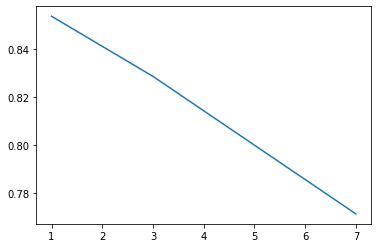

Using 40 Principal Components 

Alpha Value:  0.85
***********************************
Using Neighbour Count =  1
[ 1.  1.  1. ... 40. 40. 40.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.85 and K =  1  =  0.8428571428571429
Using Neighbour Count =  3
[ 1.  1.  1. ... 40. 40. 40.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.85 and K =  3  =  0.8142857142857143
Using Neighbour Count =  5
[ 1.  1.  1. ... 40. 40. 40.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.85 and K =  5  =  0.7785714285714286
Using Neighbour Count =  7
[ 1.  1.  1. ... 40. 40. 40.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.85 and K =  7  =  0.7678571428571429
Wrong Predictions =  65
***********************************


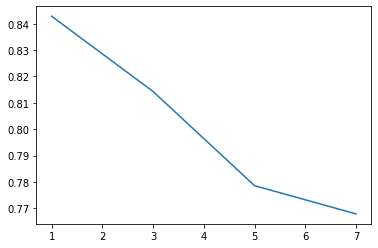

Using 55 Principal Components 

Alpha Value:  0.9
***********************************
Using Neighbour Count =  1
[ 1.  1.  1. ... 40. 40. 40.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.9 and K =  1  =  0.8428571428571429
Using Neighbour Count =  3
[ 1.  1.  1. ... 40. 40. 40.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.9 and K =  3  =  0.8
Using Neighbour Count =  5
[ 1.  1.  1. ... 40. 40. 40.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.9 and K =  5  =  0.775
Using Neighbour Count =  7
[ 1.  1.  1. ... 40. 40. 18.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.9 and K =  7  =  0.7571428571428571
Wrong Predictions =  68
***********************************


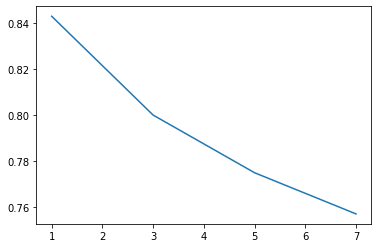

Using 78 Principal Components 

Alpha Value:  0.95
***********************************
Using Neighbour Count =  1
[ 1.  1.  1. ... 40. 40. 40.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.95 and K =  1  =  0.85
Using Neighbour Count =  3
[ 1.  1.  1. ... 40. 40. 40.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.95 and K =  3  =  0.8071428571428572
Using Neighbour Count =  5
[ 1.  1.  1. ... 40. 40. 40.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.95 and K =  5  =  0.775
Using Neighbour Count =  7
[ 1.  1.  1. ... 40. 40. 18.]
[ 1.  1.  1. ... 40. 40. 40.]
Accuracy with alpha =  0.95 and K =  7  =  0.7392857142857143
Wrong Predictions =  73
***********************************


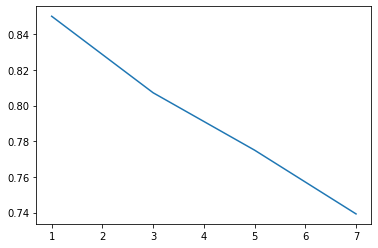

In [ ]:
# 30/70 Split
PCA(alphaValues,trains,tests)

In [ ]:
training['Label'] = 1

In [ ]:
#new non faces dataset

def load_dataset(path):
  data1 = []
  labels = []

  for i in range (1, 8):
    for pic in glob.glob(path +"s" + str(i) + "/"+"*.jpg"):
      img = cv2.imread(pic,cv2.IMREAD_GRAYSCALE)
      img=cv2.resize(img, (92,112), interpolation = cv2.INTER_AREA)
      img = np.array(img)
      vec = img.ravel()

      labels = np.append(labels, [i])
      data1 = np.append(data1, vec)
  data1 = data1.reshape((463, 10304))

  return data1,labels

In [ ]:
nonfaces_data,nonfaces_labels =  load_dataset("/content/drive/MyDrive/Data/")
nonfaces_data=nonfaces_data[0:400]
nonfaces_labels=nonfaces_labels[0:400]
print(nonfaces_data)
print(nonfaces_data.shape)

[[254. 254. 254. ... 254. 254. 254.]
 [239. 240. 241. ... 161. 171. 149.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [228. 182. 185. ... 242. 244. 246.]
 [  0.   0.   0. ...   0.   0.   0.]
 [192. 192. 192. ... 192. 192. 192.]]
(400, 10304)


In [ ]:
nonfaces_data_reduced,nonfaces_labels_reduced =  load_dataset("/content/drive/MyDrive/Data/")
nonfaces_data_reduced=nonfaces_data_reduced[0:200]
nonfaces_labels_reduced=nonfaces_labels_reduced[0:200]
print(nonfaces_data_reduced)
print(nonfaces_data_reduced.shape)

[[254. 254. 254. ... 254. 254. 254.]
 [239. 240. 241. ... 161. 171. 149.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [235. 231. 238. ... 249. 252. 253.]
 [255. 255. 255. ... 255. 255. 255.]
 [238. 238. 238. ... 211. 212. 211.]]
(200, 10304)


In [ ]:
nonfaces_data_reduced_one,nonfaces_labels_reduced_one =  load_dataset("/content/drive/MyDrive/Data/")
nonfaces_data_reduced_one=nonfaces_data_reduced_one[0:100]
nonfaces_labels_reduced_one=nonfaces_labels_reduced_one[0:100]
print(nonfaces_data_reduced_one)
print(nonfaces_data_reduced_one.shape)

[[254. 254. 254. ... 254. 254. 254.]
 [239. 240. 241. ... 161. 171. 149.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [175. 188. 195. ...  50.  44.  48.]
 [  0.   0.   0. ...   0.   0.   0.]]
(100, 10304)


In [ ]:
nonfaces_data_reduced_two,nonfaces_labels_reduced_two =  load_dataset("/content/drive/MyDrive/Data/")
nonfaces_data_reduced_two=nonfaces_data_reduced_two[0:50]
nonfaces_labels_reduced_two=nonfaces_labels_reduced_two[0:50]
print(nonfaces_data_reduced_two)
print(nonfaces_data_reduced_two.shape)

[[254. 254. 254. ... 254. 254. 254.]
 [239. 240. 241. ... 161. 171. 149.]
 [  0.   0.   0. ...   0.   0.   0.]
 ...
 [127. 127. 128. ... 156. 155. 147.]
 [255. 255. 255. ... 255. 255. 255.]
 [ 21.  23.  33. ... 223. 227. 246.]]
(50, 10304)


In [ ]:
df_nonfaces_data = pd.DataFrame(nonfaces_data)
print(df_nonfaces_data)

     0      1      2      3      4      ...  10299  10300  10301  10302  10303
0    254.0  254.0  254.0  254.0  254.0  ...  254.0  254.0  254.0  254.0  254.0
1    239.0  240.0  241.0  241.0  242.0  ...  166.0  160.0  161.0  171.0  149.0
2      0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3     99.0   45.0   21.0   19.0   19.0  ...   36.0   36.0   38.0   42.0   82.0
4      0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
395  192.0  177.0  131.0  120.0  120.0  ...  187.0  184.0  190.0  192.0  206.0
396  226.0  232.0  233.0  229.0  221.0  ...  174.0  165.0  146.0  118.0   85.0
397  228.0  182.0  185.0  183.0  181.0  ...  237.0  239.0  242.0  244.0  246.0
398    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
399  192.0  192.0  192.0  192.0  192.0  ...  192.0  192.0  192.0  192.0  192.0

[400 rows x 10304 columns]


In [ ]:
df_nonfaces_data_reduced = pd.DataFrame(nonfaces_data_reduced)
print(df_nonfaces_data_reduced)

     0      1      2      3      4      ...  10299  10300  10301  10302  10303
0    254.0  254.0  254.0  254.0  254.0  ...  254.0  254.0  254.0  254.0  254.0
1    239.0  240.0  241.0  241.0  242.0  ...  166.0  160.0  161.0  171.0  149.0
2      0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3     99.0   45.0   21.0   19.0   19.0  ...   36.0   36.0   38.0   42.0   82.0
4      0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
195    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
196    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
197  235.0  231.0  238.0  234.0  215.0  ...  248.0  251.0  249.0  252.0  253.0
198  255.0  255.0  255.0  255.0  255.0  ...  255.0  255.0  255.0  255.0  255.0
199  238.0  238.0  238.0  239.0  239.0  ...  211.0  211.0  211.0  212.0  211.0

[200 rows x 10304 columns]


In [ ]:
 df_nonfaces_data_reduced_one=pd.DataFrame(nonfaces_data_reduced_one)
 print(df_nonfaces_data_reduced_one)

    0      1      2      3      4      ...  10299  10300  10301  10302  10303
0   254.0  254.0  254.0  254.0  254.0  ...  254.0  254.0  254.0  254.0  254.0
1   239.0  240.0  241.0  241.0  242.0  ...  166.0  160.0  161.0  171.0  149.0
2     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3    99.0   45.0   21.0   19.0   19.0  ...   36.0   36.0   38.0   42.0   82.0
4     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
..    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
95    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
96  103.0  100.0  113.0  110.0   94.0  ...  176.0  151.0  156.0  113.0   99.0
97  255.0  255.0  255.0  250.0  251.0  ...  255.0  255.0  255.0  255.0  255.0
98  175.0  188.0  195.0  186.0  171.0  ...  102.0   53.0   50.0   44.0   48.0
99    0.0    0.0    0.0    1.0    2.0  ...    2.0    0.0    0.0    0.0    0.0

[100 rows x 10304 columns]


In [ ]:
df_nonfaces_data_reduced_two=pd.DataFrame(nonfaces_data_reduced_two)
print(df_nonfaces_data_reduced_two)

    0      1      2      3      4      ...  10299  10300  10301  10302  10303
0   254.0  254.0  254.0  254.0  254.0  ...  254.0  254.0  254.0  254.0  254.0
1   239.0  240.0  241.0  241.0  242.0  ...  166.0  160.0  161.0  171.0  149.0
2     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
3    99.0   45.0   21.0   19.0   19.0  ...   36.0   36.0   38.0   42.0   82.0
4     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
5   251.0  148.0   34.0   17.0   15.0  ...  255.0  255.0  254.0  254.0  254.0
6     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
7     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0    0.0
8   255.0  255.0  255.0  255.0  255.0  ...  255.0  255.0  255.0  255.0  255.0
9    91.0  154.0   70.0   53.0   67.0  ...  167.0  116.0  125.0  135.0   82.0
10  128.0  136.0  136.0  122.0  117.0  ...  129.0  124.0  128.0  124.0  128.0
11  135.0  131.0  111.0  129.0  153.0  ...  130.0  131.0  121.0 

In [ ]:
df_nonfaces_data['Label'] = 2
print(df_nonfaces_data)

         0      1      2      3      4  ...  10300  10301  10302  10303  Label
0    254.0  254.0  254.0  254.0  254.0  ...  254.0  254.0  254.0  254.0      2
1    239.0  240.0  241.0  241.0  242.0  ...  160.0  161.0  171.0  149.0      2
2      0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0      2
3     99.0   45.0   21.0   19.0   19.0  ...   36.0   38.0   42.0   82.0      2
4      0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0      2
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
395  192.0  177.0  131.0  120.0  120.0  ...  184.0  190.0  192.0  206.0      2
396  226.0  232.0  233.0  229.0  221.0  ...  165.0  146.0  118.0   85.0      2
397  228.0  182.0  185.0  183.0  181.0  ...  239.0  242.0  244.0  246.0      2
398    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0      2
399  192.0  192.0  192.0  192.0  192.0  ...  192.0  192.0  192.0  192.0      2

[400 rows x 10305 columns]


In [ ]:
df_nonfaces_data_reduced['Label'] = 2
print(df_nonfaces_data_reduced)

         0      1      2      3      4  ...  10300  10301  10302  10303  Label
0    254.0  254.0  254.0  254.0  254.0  ...  254.0  254.0  254.0  254.0      2
1    239.0  240.0  241.0  241.0  242.0  ...  160.0  161.0  171.0  149.0      2
2      0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0      2
3     99.0   45.0   21.0   19.0   19.0  ...   36.0   38.0   42.0   82.0      2
4      0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0      2
..     ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
195    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0      2
196    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0      2
197  235.0  231.0  238.0  234.0  215.0  ...  251.0  249.0  252.0  253.0      2
198  255.0  255.0  255.0  255.0  255.0  ...  255.0  255.0  255.0  255.0      2
199  238.0  238.0  238.0  239.0  239.0  ...  211.0  211.0  212.0  211.0      2

[200 rows x 10305 columns]


In [ ]:
df_nonfaces_data_reduced_one['Label'] = 2
print(df_nonfaces_data_reduced_one)

        0      1      2      3      4  ...  10300  10301  10302  10303  Label
0   254.0  254.0  254.0  254.0  254.0  ...  254.0  254.0  254.0  254.0      2
1   239.0  240.0  241.0  241.0  242.0  ...  160.0  161.0  171.0  149.0      2
2     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0      2
3    99.0   45.0   21.0   19.0   19.0  ...   36.0   38.0   42.0   82.0      2
4     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0      2
..    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
95    0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0      2
96  103.0  100.0  113.0  110.0   94.0  ...  151.0  156.0  113.0   99.0      2
97  255.0  255.0  255.0  250.0  251.0  ...  255.0  255.0  255.0  255.0      2
98  175.0  188.0  195.0  186.0  171.0  ...   53.0   50.0   44.0   48.0      2
99    0.0    0.0    0.0    1.0    2.0  ...    0.0    0.0    0.0    0.0      2

[100 rows x 10305 columns]


In [ ]:
df_nonfaces_data_reduced_two['Label'] = 2
print(df_nonfaces_data_reduced_two)

        0      1      2      3      4  ...  10300  10301  10302  10303  Label
0   254.0  254.0  254.0  254.0  254.0  ...  254.0  254.0  254.0  254.0      2
1   239.0  240.0  241.0  241.0  242.0  ...  160.0  161.0  171.0  149.0      2
2     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0      2
3    99.0   45.0   21.0   19.0   19.0  ...   36.0   38.0   42.0   82.0      2
4     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0      2
5   251.0  148.0   34.0   17.0   15.0  ...  255.0  254.0  254.0  254.0      2
6     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0      2
7     0.0    0.0    0.0    0.0    0.0  ...    0.0    0.0    0.0    0.0      2
8   255.0  255.0  255.0  255.0  255.0  ...  255.0  255.0  255.0  255.0      2
9    91.0  154.0   70.0   53.0   67.0  ...  116.0  125.0  135.0   82.0      2
10  128.0  136.0  136.0  122.0  117.0  ...  124.0  128.0  124.0  128.0      2
11  135.0  131.0  111.0  129.0  153.0  ...  131.0  121.0  127.0 

In [ ]:
testing_nonfaces = df_nonfaces_data.iloc[::2]
testing_nonfaces


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10265,10266,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276,10277,10278,10279,10280,10281,10282,10283,10284,10285,10286,10287,10288,10289,10290,10291,10292,10293,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303,Label
0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,...,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,3.0,4.0,8.0,6.0,6.0,7.0,4.0,4.0,5.0,4.0,5.0,26.0,37.0,40.0,42.0,37.0,51.0,83.0,93.0,97.0,88.0,86.0,67.0,103.0,114.0,134.0,150.0,153.0,...,46.0,15.0,19.0,23.0,31.0,24.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,3.0,5.0,18.0,146.0,160.0,160.0,158.0,160.0,155.0,143.0,131.0,129.0,131.0,132.0,136.0,138.0,145.0,149.0,154.0,160.0,165.0,164.0,164.0,166.0,162.0,152.0,144.0,139.0,140.0,141.0,140.0,143.0,145.0,144.0,145.0,...,141.0,130.0,140.0,142.0,141.0,143.0,141.0,139.0,141.0,142.0,142.0,147.0,149.0,144.0,143.0,145.0,141.0,145.0,152.0,148.0,147.0,48.0,8.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,253.0,253.0,255.0,254.0,253.0,253.0,253.0,251.0,253.0,253.0,253.0,252.0,251.0,251.0,250.0,250.0,247.0,248.0,247.0,247.0,...,254.0,254.0,254.0,254.0,253.0,253.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,12.0,14.0,16.0,18.0,17.0,17.0,17.0,15.0,19.0,21.0,22.0,26.0,26.0,25.0,25.0,22.0,23.0,27.0,30.0,33.0,37.0,28.0,36.0,35.0,30.0,23.0,18.0,17.0,25.0,30.0,30.0,39.0,38.0,36.0,36.0,34.0,27.0,26.0,28.0,26.0,...,16.0,17.0,18.0,19.0,16.0,12.0,9.0,11.0,10.0,12.0,13.0,13.0,11.0,13.0,15.0,13.0,10.0,9.0,12.0,13.0,14.0,15.0,22.0,22.0,13.0,10.0,10.0,10.0,9.0,7.0,8.0,9.0,13.0,14.0,17.0,14.0,14.0,18.0,16.0,2
392,114.0,114.0,121.0,139.0,142.0,141.0,138.0,141.0,143.0,138.0,137.0,139.0,141.0,139.0,137.0,125.0,119.0,100.0,109.0,124.0,133.0,129.0,125.0,141.0,139.0,148.0,137.0,129.0,131.0,117.0,106.0,87.0,96.0,93.0,91.0,100.0,112.0,116.0,117.0,112.0,...,0.0,3.0,3.0,1.0,1.0,3.0,1.0,11.0,41.0,15.0,9.0,4.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,4.0,5.0,6.0,6.0,6.0,8.0,19.0,16.0,22.0,8.0,5.0,7.0,10.0,4.0,32.0,170.0,2
394,87.0,118.0,102.0,122.0,139.0,91.0,66.0,79.0,50.0,38.0,77.0,96.0,94.0,86.0,192.0,150.0,120.0,163.0,104.0,92.0,77.0,78.0,86.0,87.0,135.0,137.0,85.0,121.0,175.0,90.0,78.0,88.0,211.0,234.0,117.0,69.0,70.0,78.0,110.0,169.0,...,74.0,70.0,55.0,140.0,167.0,108.0,90.0,87.0,85.0,83.0,89.0,80.0,59.0,81.0,72.0,70.0,87.0,75.0,83.0,99.0,98.0,106.0,108.0,116.0,113.0,114.0,100.0,110.0,111.0,107.0,113.0,116.0,119.0,114.0,117.0,123.0,114.0,38.0

In [ ]:
testing_nonfaces_reduced = df_nonfaces_data_reduced.iloc[::2]
testing_nonfaces_reduced

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10265,10266,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276,10277,10278,10279,10280,10281,10282,10283,10284,10285,10286,10287,10288,10289,10290,10291,10292,10293,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303,Label
0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,...,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,3.0,4.0,8.0,6.0,6.0,7.0,4.0,4.0,5.0,4.0,5.0,26.0,37.0,40.0,42.0,37.0,51.0,83.0,93.0,97.0,88.0,86.0,67.0,103.0,114.0,134.0,150.0,153.0,...,46.0,15.0,19.0,23.0,31.0,24.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,3.0,5.0,18.0,146.0,160.0,160.0,158.0,160.0,155.0,143.0,131.0,129.0,131.0,132.0,136.0,138.0,145.0,149.0,154.0,160.0,165.0,164.0,164.0,166.0,162.0,152.0,144.0,139.0,140.0,141.0,140.0,143.0,145.0,144.0,145.0,...,141.0,130.0,140.0,142.0,141.0,143.0,141.0,139.0,141.0,142.0,142.0,147.0,149.0,144.0,143.0,145.0,141.0,145.0,152.0,148.0,147.0,48.0,8.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,253.0,253.0,255.0,254.0,253.0,253.0,253.0,251.0,253.0,253.0,253.0,252.0,251.0,251.0,250.0,250.0,247.0,248.0,247.0,247.0,...,254.0,254.0,254.0,254.0,253.0,253.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,61.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,215.0,...,174.0,171.0,165.0,178.0,189.0,198.0,114.0,13.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
192,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,170.0,252.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,171.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
194,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,7.0,1.0,1.0,2.0,4.0,10.0,122.0,191.0,188.0,185.0,181.0,178.0,175.0,169.0,169.0,187.0,169.0,161.0,162.0,...,172.0,171.0,163.0,160.0,152.0,144.0,142.0,138.0,133.0,132.0,132.0,133.0,141.0,154.0,158.0,162.0,173.0,176.0,161.0,153.0,148.0,82.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,7.0,59.0,137.0,143.

In [ ]:
testing_nonfaces_reduced_one = df_nonfaces_data_reduced_one.iloc[::2]
testing_nonfaces_reduced_one

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10265,10266,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276,10277,10278,10279,10280,10281,10282,10283,10284,10285,10286,10287,10288,10289,10290,10291,10292,10293,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303,Label
0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,...,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,3.0,4.0,8.0,6.0,6.0,7.0,4.0,4.0,5.0,4.0,5.0,26.0,37.0,40.0,42.0,37.0,51.0,83.0,93.0,97.0,88.0,86.0,67.0,103.0,114.0,134.0,150.0,153.0,...,46.0,15.0,19.0,23.0,31.0,24.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,3.0,5.0,18.0,146.0,160.0,160.0,158.0,160.0,155.0,143.0,131.0,129.0,131.0,132.0,136.0,138.0,145.0,149.0,154.0,160.0,165.0,164.0,164.0,166.0,162.0,152.0,144.0,139.0,140.0,141.0,140.0,143.0,145.0,144.0,145.0,...,141.0,130.0,140.0,142.0,141.0,143.0,141.0,139.0,141.0,142.0,142.0,147.0,149.0,144.0,143.0,145.0,141.0,145.0,152.0,148.0,147.0,48.0,8.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,253.0,253.0,255.0,254.0,253.0,253.0,253.0,251.0,253.0,253.0,253.0,252.0,251.0,251.0,250.0,250.0,247.0,248.0,247.0,247.0,...,254.0,254.0,254.0,254.0,253.0,253.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
10,128.0,136.0,136.0,122.0,117.0,139.0,136.0,129.0,124.0,130.0,119.0,110.0,137.0,134.0,129.0,110.0,136.0,139.0,126.0,119.0,102.0,117.0,122.0,119.0,119.0,109.0,124.0,127.0,113.0,115.0,109.0,126.0,131.0,124.0,132.0,116.0,115.0,111.0,116.0,119.0,...,133.0,140.0,133.0,126.0,88.0,80.0,82.0,149.0,206.0,177.0,178.0,153.0,161.0,149.0,121.0,128.0,133.0,140.0,136.0,143.0,136.0,133.0,131.0,137.0,96.0,73.0,81.0,173.0,151.0,129.0,116.0,122.0,115.0,121.0,129.0,124.0,128.0,124.0,128.0,2
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,4.0,4.0,6.0,6.0,9.0,85.0,204.0,251.0,250.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,...,180.0,196.0,193.0,182.0,185.0,187.0,193.0,182.0,177.0,185.0,186.0,191.0,190.0,179.0,180.0,193.0,185.0,180.0,196.0,185.0,187.0,191.0,188.0,195.0,190.0,182.0,170.0,165.0,169.0,172.0,165.0,170.0,163.0,79.0,31.0,6.0,5.0,2.0,0.0,2
14,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,...,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,2
16,104.0,105.0,125.0,127.0,118.0,124.0,113.0,104.0,83.0,119.0,95.0,86.0,107.0,119.0,90.0,97.0,108.0,86.0,87.0,75.0,84.0,91.0,95.0,83.0,89.0,65.0,51.0,50.0,70.0,91.0,65.0,83.0,83.0,68.0,55.0,72.0,76.0,65.0,47.0,49.0,...,115.0,107.0,82.0,93.0,94.0,117.0,106.

In [ ]:
testing_nonfaces_reduced_two = df_nonfaces_data_reduced_two.iloc[::2]
testing_nonfaces_reduced_two

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10265,10266,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276,10277,10278,10279,10280,10281,10282,10283,10284,10285,10286,10287,10288,10289,10290,10291,10292,10293,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303,Label
0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,...,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,254.0,2
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.0,2.0,3.0,4.0,8.0,6.0,6.0,7.0,4.0,4.0,5.0,4.0,5.0,26.0,37.0,40.0,42.0,37.0,51.0,83.0,93.0,97.0,88.0,86.0,67.0,103.0,114.0,134.0,150.0,153.0,...,46.0,15.0,19.0,23.0,31.0,24.0,4.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,0.0,0.0,0.0,0.0,0.0,3.0,5.0,18.0,146.0,160.0,160.0,158.0,160.0,155.0,143.0,131.0,129.0,131.0,132.0,136.0,138.0,145.0,149.0,154.0,160.0,165.0,164.0,164.0,166.0,162.0,152.0,144.0,139.0,140.0,141.0,140.0,143.0,145.0,144.0,145.0,...,141.0,130.0,140.0,142.0,141.0,143.0,141.0,139.0,141.0,142.0,142.0,147.0,149.0,144.0,143.0,145.0,141.0,145.0,152.0,148.0,147.0,48.0,8.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
8,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,253.0,253.0,255.0,254.0,253.0,253.0,253.0,251.0,253.0,253.0,253.0,252.0,251.0,251.0,250.0,250.0,247.0,248.0,247.0,247.0,...,254.0,254.0,254.0,254.0,253.0,253.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,2
10,128.0,136.0,136.0,122.0,117.0,139.0,136.0,129.0,124.0,130.0,119.0,110.0,137.0,134.0,129.0,110.0,136.0,139.0,126.0,119.0,102.0,117.0,122.0,119.0,119.0,109.0,124.0,127.0,113.0,115.0,109.0,126.0,131.0,124.0,132.0,116.0,115.0,111.0,116.0,119.0,...,133.0,140.0,133.0,126.0,88.0,80.0,82.0,149.0,206.0,177.0,178.0,153.0,161.0,149.0,121.0,128.0,133.0,140.0,136.0,143.0,136.0,133.0,131.0,137.0,96.0,73.0,81.0,173.0,151.0,129.0,116.0,122.0,115.0,121.0,129.0,124.0,128.0,124.0,128.0,2
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,4.0,4.0,4.0,6.0,6.0,9.0,85.0,204.0,251.0,250.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,...,180.0,196.0,193.0,182.0,185.0,187.0,193.0,182.0,177.0,185.0,186.0,191.0,190.0,179.0,180.0,193.0,185.0,180.0,196.0,185.0,187.0,191.0,188.0,195.0,190.0,182.0,170.0,165.0,169.0,172.0,165.0,170.0,163.0,79.0,31.0,6.0,5.0,2.0,0.0,2
14,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,...,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,44.0,2
16,104.0,105.0,125.0,127.0,118.0,124.0,113.0,104.0,83.0,119.0,95.0,86.0,107.0,119.0,90.0,97.0,108.0,86.0,87.0,75.0,84.0,91.0,95.0,83.0,89.0,65.0,51.0,50.0,70.0,91.0,65.0,83.0,83.0,68.0,55.0,72.0,76.0,65.0,47.0,49.0,...,115.0,107.0,82.0,93.0,94.0,117.0,106.

In [ ]:
testing_nonfaces['Label'].value_counts()


2    200
Name: Label, dtype: int64

In [ ]:
training_nonfaces = df_nonfaces_data.iloc[1::2]
training_nonfaces

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10265,10266,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276,10277,10278,10279,10280,10281,10282,10283,10284,10285,10286,10287,10288,10289,10290,10291,10292,10293,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303,Label
1,239.0,240.0,241.0,241.0,242.0,242.0,242.0,240.0,240.0,240.0,240.0,240.0,241.0,233.0,151.0,151.0,253.0,254.0,250.0,234.0,238.0,239.0,239.0,238.0,237.0,237.0,236.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,170.0,182.0,168.0,178.0,188.0,163.0,155.0,159.0,179.0,193.0,185.0,172.0,163.0,162.0,158.0,167.0,155.0,184.0,173.0,170.0,184.0,172.0,162.0,161.0,175.0,172.0,165.0,162.0,180.0,175.0,168.0,153.0,174.0,169.0,166.0,160.0,161.0,171.0,149.0,2
3,99.0,45.0,21.0,19.0,19.0,81.0,41.0,32.0,32.0,114.0,135.0,136.0,142.0,140.0,146.0,142.0,150.0,154.0,156.0,162.0,162.0,160.0,166.0,164.0,166.0,166.0,173.0,171.0,170.0,177.0,174.0,180.0,182.0,187.0,183.0,183.0,186.0,184.0,182.0,186.0,...,35.0,38.0,38.0,36.0,33.0,35.0,59.0,74.0,82.0,62.0,42.0,48.0,50.0,50.0,57.0,47.0,47.0,54.0,64.0,68.0,72.0,50.0,53.0,56.0,58.0,40.0,17.0,17.0,40.0,55.0,49.0,47.0,50.0,37.0,36.0,36.0,38.0,42.0,82.0,2
5,251.0,148.0,34.0,17.0,15.0,19.0,18.0,16.0,17.0,16.0,15.0,16.0,15.0,15.0,15.0,15.0,15.0,18.0,17.0,17.0,20.0,31.0,88.0,90.0,34.0,40.0,31.0,32.0,22.0,20.0,31.0,37.0,42.0,59.0,108.0,127.0,109.0,58.0,49.0,44.0,...,253.0,252.0,251.0,252.0,252.0,252.0,253.0,252.0,251.0,253.0,255.0,254.0,254.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,254.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,5.0,2.0,6.0,49.0,88.0,101.0,96.0,96.0,96.0,102.0,101.0,95.0,90.0,104.0,90.0,96.0,90.0,99.0,101.0,103.0,89.0,97.0,98.0,99.0,98.0,89.0,96.0,87.0,...,100.0,110.0,120.0,120.0,116.0,95.0,100.0,101.0,106.0,110.0,104.0,96.0,96.0,108.0,116.0,116.0,107.0,103.0,105.0,102.0,84.0,23.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,91.0,154.0,70.0,53.0,67.0,60.0,35.0,57.0,109.0,111.0,85.0,82.0,70.0,64.0,73.0,59.0,79.0,65.0,61.0,50.0,109.0,79.0,42.0,43.0,60.0,55.0,68.0,21.0,61.0,129.0,142.0,127.0,75.0,57.0,68.0,128.0,125.0,122.0,75.0,109.0,...,126.0,148.0,211.0,201.0,213.0,182.0,143.0,184.0,191.0,181.0,186.0,157.0,154.0,134.0,185.0,154.0,157.0,174.0,206.0,222.0,186.0,173.0,200.0,233.0,198.0,177.0,112.0,123.0,94.0,92.0,93.0,98.0,99.0,145.0,167.0,116.0,125.0,135.0,82.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,40.0,58.0,83.0,91.0,77.0,57.0,39.0,36.0,40.0,52.0,62.0,64.0,64.0,64.0,67.0,135.0,153.0,158.0,157.0,158.0,167.0,158.0,102.0,80.0,78.0,78.0,102.0,172.0,173.0,172.0,177.0,181.0,179.0,179.0,178.0,174.0,174.0,174.0,173.0,173.0,...,47.0,44.0,43.0,46.0,48.0,51.0,55.0,55.0,61.0,61.0,56.0,66.0,65.0,63.0,69.0,68.0,68.0,65.0,57.0,53.0,51.0,56.0,58.0,57.0,67.0,82.0,69.0,64.0,70.0,87.0,114.0,122.0,119.0,121.0,111.0,59.0,24.0,15.0,11.0,2
393,82.0,83.0,85.0,86.0,86.0,84.0,83.0,81.0,82.0,82.0,81.0,85.0,83.0,82.0,81.0,83.0,83.0,82.0,81.0,80.0,80.0,81.0,81.0,79.0,77.0,78.0,76.0,74.0,170.0,68.0,72.0,72.0,71.0,72.0,139.0,159.0,139.0,143.0,156.0,82.0,...,30.0,29.0,28.0,29.0,29.0,29.0,28.0,28.0,30.0,32.0,31.0,31.0,36.0,36.0,35.0,38.0,37.0,40.0,45.0,45.0,47.0,46.0,44.0,47.0,49.0,50.0,44.0,40.0,42.0,42.0,44.0,44.0,46.0,43.0,45.0,44.0,45.0,45.0,42.0,2
395,192.0,177.0,131.0,120.0,120.0,119.0,139.0,159.0,167.0,163.0,163.0,161.0,146.0,132.0,137.0,136.0,132.0,140.0,141.0,134.0,141.0,154.0,150.0,140.0,122.0,117.0,120.0,130.0,122.0,128.0,133.0,142.0,152.0,155.0,158.0,151.0,137.0,140.0,143.0,149.0,...,156.0,155.0,155.0,155.

In [ ]:
training_nonfaces_reduced = df_nonfaces_data_reduced.iloc[1::2]
training_nonfaces_reduced

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10265,10266,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276,10277,10278,10279,10280,10281,10282,10283,10284,10285,10286,10287,10288,10289,10290,10291,10292,10293,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303,Label
1,239.0,240.0,241.0,241.0,242.0,242.0,242.0,240.0,240.0,240.0,240.0,240.0,241.0,233.0,151.0,151.0,253.0,254.0,250.0,234.0,238.0,239.0,239.0,238.0,237.0,237.0,236.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,170.0,182.0,168.0,178.0,188.0,163.0,155.0,159.0,179.0,193.0,185.0,172.0,163.0,162.0,158.0,167.0,155.0,184.0,173.0,170.0,184.0,172.0,162.0,161.0,175.0,172.0,165.0,162.0,180.0,175.0,168.0,153.0,174.0,169.0,166.0,160.0,161.0,171.0,149.0,2
3,99.0,45.0,21.0,19.0,19.0,81.0,41.0,32.0,32.0,114.0,135.0,136.0,142.0,140.0,146.0,142.0,150.0,154.0,156.0,162.0,162.0,160.0,166.0,164.0,166.0,166.0,173.0,171.0,170.0,177.0,174.0,180.0,182.0,187.0,183.0,183.0,186.0,184.0,182.0,186.0,...,35.0,38.0,38.0,36.0,33.0,35.0,59.0,74.0,82.0,62.0,42.0,48.0,50.0,50.0,57.0,47.0,47.0,54.0,64.0,68.0,72.0,50.0,53.0,56.0,58.0,40.0,17.0,17.0,40.0,55.0,49.0,47.0,50.0,37.0,36.0,36.0,38.0,42.0,82.0,2
5,251.0,148.0,34.0,17.0,15.0,19.0,18.0,16.0,17.0,16.0,15.0,16.0,15.0,15.0,15.0,15.0,15.0,18.0,17.0,17.0,20.0,31.0,88.0,90.0,34.0,40.0,31.0,32.0,22.0,20.0,31.0,37.0,42.0,59.0,108.0,127.0,109.0,58.0,49.0,44.0,...,253.0,252.0,251.0,252.0,252.0,252.0,253.0,252.0,251.0,253.0,255.0,254.0,254.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,254.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,5.0,2.0,6.0,49.0,88.0,101.0,96.0,96.0,96.0,102.0,101.0,95.0,90.0,104.0,90.0,96.0,90.0,99.0,101.0,103.0,89.0,97.0,98.0,99.0,98.0,89.0,96.0,87.0,...,100.0,110.0,120.0,120.0,116.0,95.0,100.0,101.0,106.0,110.0,104.0,96.0,96.0,108.0,116.0,116.0,107.0,103.0,105.0,102.0,84.0,23.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,91.0,154.0,70.0,53.0,67.0,60.0,35.0,57.0,109.0,111.0,85.0,82.0,70.0,64.0,73.0,59.0,79.0,65.0,61.0,50.0,109.0,79.0,42.0,43.0,60.0,55.0,68.0,21.0,61.0,129.0,142.0,127.0,75.0,57.0,68.0,128.0,125.0,122.0,75.0,109.0,...,126.0,148.0,211.0,201.0,213.0,182.0,143.0,184.0,191.0,181.0,186.0,157.0,154.0,134.0,185.0,154.0,157.0,174.0,206.0,222.0,186.0,173.0,200.0,233.0,198.0,177.0,112.0,123.0,94.0,92.0,93.0,98.0,99.0,145.0,167.0,116.0,125.0,135.0,82.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
191,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,126.0,187.0,188.0,190.0,190.0,187.0,187.0,187.0,188.0,...,17.0,25.0,29.0,27.0,19.0,13.0,9.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,4.0,4.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
195,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,19.0,44.0,55.0,54.0,59.0,53.0,45.0,35.0,23.0,27.0,72.0,86.0,92.0,100.0,...,243.0,243.0,243.0,243.0,243.0,243.0,243.0,243.0,243.0,243.0,241.0,243.0,118.0,5.0,4.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
197,235.0,231.0,238.0,234.0,215.0,210.0,220.0,231.0,235.0,239.0,240.0,

In [ ]:
training_nonfaces_reduced_one = df_nonfaces_data_reduced_one.iloc[1::2]
training_nonfaces_reduced_one

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10265,10266,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276,10277,10278,10279,10280,10281,10282,10283,10284,10285,10286,10287,10288,10289,10290,10291,10292,10293,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303,Label
1,239.0,240.0,241.0,241.0,242.0,242.0,242.0,240.0,240.0,240.0,240.0,240.0,241.0,233.0,151.0,151.0,253.0,254.0,250.0,234.0,238.0,239.0,239.0,238.0,237.0,237.0,236.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,170.0,182.0,168.0,178.0,188.0,163.0,155.0,159.0,179.0,193.0,185.0,172.0,163.0,162.0,158.0,167.0,155.0,184.0,173.0,170.0,184.0,172.0,162.0,161.0,175.0,172.0,165.0,162.0,180.0,175.0,168.0,153.0,174.0,169.0,166.0,160.0,161.0,171.0,149.0,2
3,99.0,45.0,21.0,19.0,19.0,81.0,41.0,32.0,32.0,114.0,135.0,136.0,142.0,140.0,146.0,142.0,150.0,154.0,156.0,162.0,162.0,160.0,166.0,164.0,166.0,166.0,173.0,171.0,170.0,177.0,174.0,180.0,182.0,187.0,183.0,183.0,186.0,184.0,182.0,186.0,...,35.0,38.0,38.0,36.0,33.0,35.0,59.0,74.0,82.0,62.0,42.0,48.0,50.0,50.0,57.0,47.0,47.0,54.0,64.0,68.0,72.0,50.0,53.0,56.0,58.0,40.0,17.0,17.0,40.0,55.0,49.0,47.0,50.0,37.0,36.0,36.0,38.0,42.0,82.0,2
5,251.0,148.0,34.0,17.0,15.0,19.0,18.0,16.0,17.0,16.0,15.0,16.0,15.0,15.0,15.0,15.0,15.0,18.0,17.0,17.0,20.0,31.0,88.0,90.0,34.0,40.0,31.0,32.0,22.0,20.0,31.0,37.0,42.0,59.0,108.0,127.0,109.0,58.0,49.0,44.0,...,253.0,252.0,251.0,252.0,252.0,252.0,253.0,252.0,251.0,253.0,255.0,254.0,254.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,254.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,5.0,2.0,6.0,49.0,88.0,101.0,96.0,96.0,96.0,102.0,101.0,95.0,90.0,104.0,90.0,96.0,90.0,99.0,101.0,103.0,89.0,97.0,98.0,99.0,98.0,89.0,96.0,87.0,...,100.0,110.0,120.0,120.0,116.0,95.0,100.0,101.0,106.0,110.0,104.0,96.0,96.0,108.0,116.0,116.0,107.0,103.0,105.0,102.0,84.0,23.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,91.0,154.0,70.0,53.0,67.0,60.0,35.0,57.0,109.0,111.0,85.0,82.0,70.0,64.0,73.0,59.0,79.0,65.0,61.0,50.0,109.0,79.0,42.0,43.0,60.0,55.0,68.0,21.0,61.0,129.0,142.0,127.0,75.0,57.0,68.0,128.0,125.0,122.0,75.0,109.0,...,126.0,148.0,211.0,201.0,213.0,182.0,143.0,184.0,191.0,181.0,186.0,157.0,154.0,134.0,185.0,154.0,157.0,174.0,206.0,222.0,186.0,173.0,200.0,233.0,198.0,177.0,112.0,123.0,94.0,92.0,93.0,98.0,99.0,145.0,167.0,116.0,125.0,135.0,82.0,2
11,135.0,131.0,111.0,129.0,153.0,142.0,128.0,113.0,117.0,120.0,124.0,113.0,146.0,149.0,143.0,137.0,132.0,161.0,147.0,140.0,140.0,138.0,132.0,124.0,121.0,111.0,110.0,109.0,106.0,100.0,97.0,98.0,99.0,107.0,61.0,61.0,56.0,67.0,69.0,50.0,...,106.0,117.0,141.0,113.0,104.0,129.0,134.0,109.0,126.0,137.0,119.0,127.0,127.0,133.0,122.0,128.0,121.0,137.0,126.0,106.0,108.0,107.0,78.0,99.0,105.0,89.0,90.0,128.0,149.0,87.0,77.0,134.0,115.0,130.0,130.0,131.0,121.0,127.0,104.0,2
13,141.0,146.0,137.0,135.0,134.0,131.0,133.0,133.0,126.0,152.0,165.0,171.0,217.0,210.0,145.0,149.0,212.0,223.0,236.0,193.0,145.0,142.0,137.0,142.0,154.0,161.0,162.0,161.0,160.0,159.0,163.0,164.0,163.0,156.0,146.0,152.0,150.0,153.0,152.0,151.0,...,153.0,137.0,135.0,44.0,76.0,74.0,49.0,48.0,123.0,195.0,130.0,40.0,47.0,57.0,52.0,43.0,40.0,30.0,28.0,26.0,25.0,35.0,27.0,36.0,39.0,45.0,33.0,27.0,30.0,50.0,85.0,119.0,64.0,50.0,40.0,107.0,109.0,30.0,53.0,2
15,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,250.0,221.0,103.0,92.0,204.0,250.0,253.0,246.0,105.0,114.0,246.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,253.0,...,253.0,255.0,255.0,254.0,249.0,214.0,128.0,68.0,40.0,7.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
17,250.0,252.0,252.0,251.0,250.0,250.0,250.0,251.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,251.0,2

In [ ]:
training_nonfaces_reduced_two = df_nonfaces_data_reduced_two.iloc[1::2]
training_nonfaces_reduced_two

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10265,10266,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276,10277,10278,10279,10280,10281,10282,10283,10284,10285,10286,10287,10288,10289,10290,10291,10292,10293,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303,Label
1,239.0,240.0,241.0,241.0,242.0,242.0,242.0,240.0,240.0,240.0,240.0,240.0,241.0,233.0,151.0,151.0,253.0,254.0,250.0,234.0,238.0,239.0,239.0,238.0,237.0,237.0,236.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,...,170.0,182.0,168.0,178.0,188.0,163.0,155.0,159.0,179.0,193.0,185.0,172.0,163.0,162.0,158.0,167.0,155.0,184.0,173.0,170.0,184.0,172.0,162.0,161.0,175.0,172.0,165.0,162.0,180.0,175.0,168.0,153.0,174.0,169.0,166.0,160.0,161.0,171.0,149.0,2
3,99.0,45.0,21.0,19.0,19.0,81.0,41.0,32.0,32.0,114.0,135.0,136.0,142.0,140.0,146.0,142.0,150.0,154.0,156.0,162.0,162.0,160.0,166.0,164.0,166.0,166.0,173.0,171.0,170.0,177.0,174.0,180.0,182.0,187.0,183.0,183.0,186.0,184.0,182.0,186.0,...,35.0,38.0,38.0,36.0,33.0,35.0,59.0,74.0,82.0,62.0,42.0,48.0,50.0,50.0,57.0,47.0,47.0,54.0,64.0,68.0,72.0,50.0,53.0,56.0,58.0,40.0,17.0,17.0,40.0,55.0,49.0,47.0,50.0,37.0,36.0,36.0,38.0,42.0,82.0,2
5,251.0,148.0,34.0,17.0,15.0,19.0,18.0,16.0,17.0,16.0,15.0,16.0,15.0,15.0,15.0,15.0,15.0,18.0,17.0,17.0,20.0,31.0,88.0,90.0,34.0,40.0,31.0,32.0,22.0,20.0,31.0,37.0,42.0,59.0,108.0,127.0,109.0,58.0,49.0,44.0,...,253.0,252.0,251.0,252.0,252.0,252.0,253.0,252.0,251.0,253.0,255.0,254.0,254.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,253.0,254.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,255.0,255.0,255.0,254.0,254.0,254.0,2
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,5.0,2.0,6.0,49.0,88.0,101.0,96.0,96.0,96.0,102.0,101.0,95.0,90.0,104.0,90.0,96.0,90.0,99.0,101.0,103.0,89.0,97.0,98.0,99.0,98.0,89.0,96.0,87.0,...,100.0,110.0,120.0,120.0,116.0,95.0,100.0,101.0,106.0,110.0,104.0,96.0,96.0,108.0,116.0,116.0,107.0,103.0,105.0,102.0,84.0,23.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9,91.0,154.0,70.0,53.0,67.0,60.0,35.0,57.0,109.0,111.0,85.0,82.0,70.0,64.0,73.0,59.0,79.0,65.0,61.0,50.0,109.0,79.0,42.0,43.0,60.0,55.0,68.0,21.0,61.0,129.0,142.0,127.0,75.0,57.0,68.0,128.0,125.0,122.0,75.0,109.0,...,126.0,148.0,211.0,201.0,213.0,182.0,143.0,184.0,191.0,181.0,186.0,157.0,154.0,134.0,185.0,154.0,157.0,174.0,206.0,222.0,186.0,173.0,200.0,233.0,198.0,177.0,112.0,123.0,94.0,92.0,93.0,98.0,99.0,145.0,167.0,116.0,125.0,135.0,82.0,2
11,135.0,131.0,111.0,129.0,153.0,142.0,128.0,113.0,117.0,120.0,124.0,113.0,146.0,149.0,143.0,137.0,132.0,161.0,147.0,140.0,140.0,138.0,132.0,124.0,121.0,111.0,110.0,109.0,106.0,100.0,97.0,98.0,99.0,107.0,61.0,61.0,56.0,67.0,69.0,50.0,...,106.0,117.0,141.0,113.0,104.0,129.0,134.0,109.0,126.0,137.0,119.0,127.0,127.0,133.0,122.0,128.0,121.0,137.0,126.0,106.0,108.0,107.0,78.0,99.0,105.0,89.0,90.0,128.0,149.0,87.0,77.0,134.0,115.0,130.0,130.0,131.0,121.0,127.0,104.0,2
13,141.0,146.0,137.0,135.0,134.0,131.0,133.0,133.0,126.0,152.0,165.0,171.0,217.0,210.0,145.0,149.0,212.0,223.0,236.0,193.0,145.0,142.0,137.0,142.0,154.0,161.0,162.0,161.0,160.0,159.0,163.0,164.0,163.0,156.0,146.0,152.0,150.0,153.0,152.0,151.0,...,153.0,137.0,135.0,44.0,76.0,74.0,49.0,48.0,123.0,195.0,130.0,40.0,47.0,57.0,52.0,43.0,40.0,30.0,28.0,26.0,25.0,35.0,27.0,36.0,39.0,45.0,33.0,27.0,30.0,50.0,85.0,119.0,64.0,50.0,40.0,107.0,109.0,30.0,53.0,2
15,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,250.0,221.0,103.0,92.0,204.0,250.0,253.0,246.0,105.0,114.0,246.0,254.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,253.0,...,253.0,255.0,255.0,254.0,249.0,214.0,128.0,68.0,40.0,7.0,5.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
17,250.0,252.0,252.0,251.0,250.0,250.0,250.0,251.0,252.0,252.0,252.0,252.0,252.0,252.0,252.0,251.0,2

In [ ]:
training_nonfaces['Label'].value_counts()   


In [ ]:
training['Label'] = 1
big_data_training = [training, training_nonfaces]
result = pd.concat(big_data_training)
display(result)


In [ ]:
df_training = pd.DataFrame(result)
print(df_training)

In [ ]:
big_data_training_reduced = [training, training_nonfaces_reduced]
result_result = pd.concat(big_data_training_reduced)
df_training_reduced = pd.DataFrame(result_result)
print(df_training_reduced)

In [ ]:
big_data_training_reduced_one = [training, training_nonfaces_reduced_one]
result_result_one = pd.concat(big_data_training_reduced_one)
df_training_reduced_one = pd.DataFrame(result_result_one)
print(df_training_reduced_one)

In [ ]:
big_data_training_reduced_two = [training, training_nonfaces_reduced_two]
result_result_two = pd.concat(big_data_training_reduced_two)
df_training_reduced_two = pd.DataFrame(result_result_two)
print(df_training_reduced_two)

        0      1      2      3      4  ...  10300  10301  10302  10303  Label
1   135.0  133.0  136.0  136.0  136.0  ...   16.0   18.0   21.0   24.0      1
3   140.0  134.0  135.0  136.0  133.0  ...   21.0   25.0   26.0   49.0      1
5   136.0  136.0  136.0  135.0  137.0  ...   15.0   19.0   20.0   21.0      1
7   134.0  138.0  136.0  134.0  137.0  ...   29.0   55.0   79.0   81.0      1
9   133.0  135.0  137.0  137.0  128.0  ...   16.0   16.0   19.0   17.0      1
..    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
41   82.0   95.0  101.0   94.0   80.0  ...  160.0  168.0  181.0  184.0      2
43  165.0  236.0  245.0  252.0  253.0  ...  189.0  183.0  180.0  128.0      2
45  120.0  131.0  244.0  242.0  250.0  ...  255.0  255.0  255.0  255.0      2
47  127.0  127.0  128.0  136.0  142.0  ...  158.0  156.0  155.0  147.0      2
49   21.0   23.0   33.0   22.0   20.0  ...  154.0  223.0  227.0  246.0      2

[225 rows x 10305 columns]


In [ ]:
testing['Label'] = 1

big_data_testing = [testing, testing_nonfaces]
result_t = pd.concat(big_data_testing)
display(result_t)


In [ ]:
df_testing = pd.DataFrame(result_t)
print(df_testing)

In [ ]:
testing['Label'] = 1

big_data_testing_reduced = [testing, testing_nonfaces_reduced]
result_t_reduced = pd.concat(big_data_testing_reduced)
display(result_t_reduced)

In [ ]:
df_testing_reduced = pd.DataFrame(result_t_reduced)
print(df_testing_reduced)

In [ ]:
testing['Label'] = 1

big_data_testing_reduced_one = [testing, testing_nonfaces_reduced_one]
result_t_reduced_one = pd.concat(big_data_testing_reduced_one)
display(result_t_reduced_one)

In [ ]:
df_testing_reduced_one = pd.DataFrame(result_t_reduced_one)
print(df_testing_reduced_one)

In [ ]:
testing['Label'] = 1

big_data_testing_reduced_two = [testing, testing_nonfaces_reduced_two]
result_t_reduced_two = pd.concat(big_data_testing_reduced_two)
display(result_t_reduced_two)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,10265,10266,10267,10268,10269,10270,10271,10272,10273,10274,10275,10276,10277,10278,10279,10280,10281,10282,10283,10284,10285,10286,10287,10288,10289,10290,10291,10292,10293,10294,10295,10296,10297,10298,10299,10300,10301,10302,10303,Label
0,133.0,129.0,133.0,130.0,130.0,132.0,129.0,132.0,128.0,133.0,132.0,130.0,126.0,125.0,130.0,130.0,134.0,128.0,124.0,126.0,130.0,124.0,127.0,126.0,94.0,46.0,34.0,37.0,31.0,27.0,33.0,29.0,31.0,26.0,25.0,31.0,27.0,34.0,28.0,34.0,...,70.0,69.0,76.0,81.0,80.0,87.0,90.0,88.0,96.0,99.0,106.0,107.0,99.0,81.0,47.0,28.0,24.0,22.0,26.0,20.0,26.0,24.0,24.0,24.0,20.0,22.0,19.0,35.0,36.0,34.0,24.0,23.0,20.0,23.0,19.0,33.0,15.0,29.0,26.0,1
2,132.0,118.0,124.0,129.0,133.0,138.0,135.0,132.0,142.0,126.0,98.0,72.0,62.0,88.0,77.0,44.0,35.0,38.0,37.0,34.0,31.0,39.0,33.0,33.0,29.0,26.0,35.0,48.0,38.0,28.0,30.0,33.0,29.0,27.0,30.0,25.0,30.0,36.0,32.0,30.0,...,147.0,144.0,146.0,147.0,137.0,130.0,127.0,122.0,120.0,99.0,38.0,16.0,18.0,18.0,22.0,18.0,20.0,22.0,18.0,21.0,18.0,17.0,18.0,19.0,16.0,19.0,14.0,19.0,21.0,20.0,27.0,26.0,53.0,66.0,61.0,65.0,56.0,67.0,62.0,1
4,133.0,135.0,135.0,136.0,133.0,135.0,132.0,133.0,134.0,136.0,133.0,132.0,135.0,133.0,132.0,135.0,134.0,126.0,127.0,129.0,132.0,126.0,132.0,133.0,137.0,131.0,99.0,86.0,104.0,68.0,53.0,71.0,88.0,76.0,91.0,90.0,76.0,77.0,100.0,107.0,...,162.0,162.0,150.0,146.0,133.0,129.0,105.0,94.0,76.0,85.0,78.0,85.0,80.0,93.0,95.0,90.0,58.0,17.0,26.0,21.0,19.0,17.0,20.0,17.0,21.0,15.0,20.0,19.0,24.0,28.0,30.0,24.0,25.0,25.0,24.0,15.0,18.0,17.0,15.0,1
6,138.0,135.0,135.0,138.0,136.0,135.0,135.0,136.0,135.0,136.0,136.0,137.0,136.0,131.0,135.0,136.0,135.0,129.0,139.0,123.0,130.0,132.0,122.0,88.0,53.0,38.0,39.0,33.0,35.0,34.0,33.0,31.0,33.0,36.0,31.0,28.0,31.0,30.0,29.0,32.0,...,121.0,119.0,102.0,87.0,94.0,99.0,99.0,96.0,97.0,79.0,36.0,16.0,18.0,19.0,21.0,14.0,20.0,16.0,21.0,19.0,22.0,18.0,19.0,22.0,20.0,25.0,17.0,21.0,19.0,17.0,16.0,21.0,15.0,15.0,21.0,16.0,23.0,18.0,35.0,1
8,137.0,135.0,136.0,136.0,136.0,138.0,136.0,126.0,139.0,128.0,132.0,127.0,137.0,137.0,133.0,136.0,142.0,136.0,82.0,59.0,86.0,56.0,40.0,30.0,37.0,38.0,29.0,39.0,23.0,35.0,31.0,30.0,27.0,31.0,30.0,27.0,28.0,35.0,28.0,30.0,...,162.0,157.0,155.0,143.0,135.0,141.0,128.0,118.0,106.0,79.0,33.0,11.0,21.0,15.0,18.0,20.0,17.0,19.0,21.0,20.0,21.0,19.0,23.0,20.0,19.0,18.0,20.0,15.0,19.0,19.0,16.0,14.0,20.0,21.0,25.0,22.0,19.0,24.0,41.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40,140.0,142.0,140.0,144.0,145.0,144.0,144.0,139.0,142.0,141.0,141.0,141.0,143.0,148.0,152.0,147.0,147.0,149.0,150.0,152.0,153.0,150.0,149.0,148.0,149.0,149.0,149.0,150.0,142.0,141.0,146.0,148.0,142.0,138.0,138.0,139.0,139.0,140.0,144.0,145.0,...,169.0,170.0,170.0,170.0,173.0,172.0,169.0,167.0,168.0,170.0,172.0,168.0,171.0,168.0,170.0,171.0,169.0,170.0,169.0,171.0,169.0,169.0,170.0,171.0,171.0,170.0,169.0,171.0,171.0,168.0,168.0,169.0,170.0,168.0,169.0,170.0,171.0,169.0,172.0,2
42,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,241.0,227.0,242.0,254.0,251.0,253.0,255.0,254.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,255.0,254.0,254.0,254.0,255.0,254.0,255.0,...,175.0,154.0,128.0,106.0,88.0,69.0,63.0,61.0,54.0,55.0,67.0,97.0,82.0,95.0,165.0,165.0,163.0,177.0,129.0,93.0,145.0,179.0,190.0,204.0,189.0,175.0,212.0,225.0,67.0,36.0,21.0,29.0,136.0,176.0,178.0,123.0,115.0,157.0,115.0,2
44,55.0,28.0,27.0,43.0,30.0,30.0,59.0,65.0,33.0,145.0,237.0,245.0,240.0,226.0,214.0,224.0,223.0,213.0,175.0,93.0,98.0,103.0,114.0,121.0,120.0,126.0,137.0,145.0,151.0,156.0,165.0,159.0,172.0,180.0,187.0,200.0,214.0,214

In [ ]:
df_testing_reduced_two = pd.DataFrame(result_result_two)
print(df_testing_reduced_two)

        0      1      2      3      4  ...  10300  10301  10302  10303  Label
1   135.0  133.0  136.0  136.0  136.0  ...   16.0   18.0   21.0   24.0      1
3   140.0  134.0  135.0  136.0  133.0  ...   21.0   25.0   26.0   49.0      1
5   136.0  136.0  136.0  135.0  137.0  ...   15.0   19.0   20.0   21.0      1
7   134.0  138.0  136.0  134.0  137.0  ...   29.0   55.0   79.0   81.0      1
9   133.0  135.0  137.0  137.0  128.0  ...   16.0   16.0   19.0   17.0      1
..    ...    ...    ...    ...    ...  ...    ...    ...    ...    ...    ...
41   82.0   95.0  101.0   94.0   80.0  ...  160.0  168.0  181.0  184.0      2
43  165.0  236.0  245.0  252.0  253.0  ...  189.0  183.0  180.0  128.0      2
45  120.0  131.0  244.0  242.0  250.0  ...  255.0  255.0  255.0  255.0      2
47  127.0  127.0  128.0  136.0  142.0  ...  158.0  156.0  155.0  147.0      2
49   21.0   23.0   33.0   22.0   20.0  ...  154.0  223.0  227.0  246.0      2

[225 rows x 10305 columns]


In [ ]:
samples = np.array([200,100])

In [ ]:
LDA(df_training_reduced,df_testing_reduced,1,2,10304,samples) 

In [ ]:
samples = np.array([200,50])

In [ ]:
LDA(df_training_reduced_one,df_testing_reduced_one,1,2,10304,samples)  

In [ ]:
samples = np.array([200,25])

In [ ]:
LDA(df_training_reduced_two,df_testing_reduced_two,1,2,10304,samples)  

In [ ]:
samples = np.array([200,200])

In [ ]:
LDA(df_training,df_testing,1,2,10304,samples)